<a href="https://colab.research.google.com/github/nkchaithu/ML-programs/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
inpt_dim = 128
index_from = 3
(x_train, y_train),(x_test, y_test)=imdb.load_data(num_words=10000,
 start_char=1,
 oov_char=2,
 index_from=index_from,
 skip_top=20)




In [ ]:
from keras_preprocessing.sequence import pad_sequences

In [ ]:
x_train = pad_sequences(x_train,
 maxlen=inpt_dim).astype('float32')
x_test = pad_sequences(x_test, maxlen=inpt_dim).astype('float32')
# let's print the shapes
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (25000, 128)
x_test shape: (25000, 128)


In [ ]:
# let's print the indices of sample #7
print(' '.join(str(int(id)) for id in x_train[7]))
# let's print the actual words of sample #7
wrd2id = imdb.get_word_index()
wrd2id = {k:(v+index_from) for k,v in wrd2id.items()}
wrd2id["<PAD>"] = 0
wrd2id["<START>"] = 1
wrd2id["<UNK>"] = 2
wrd2id["<UNUSED>"] = 3
id2wrd = {value:key for key,value in wrd2id.items()}
print(' '.join(id2wrd[id] for id in x_train[7] ))


55 655 707 6371 956 225 1456 841 42 1310 225 2 2493 1467 7722 2828 21 2 2 2 364 23 2 2228 2407 225 24 76 133 2 2 189 2293 2 2 814 2 2 2 2642 2 47 2 682 364 352 168 44 2 45 24 913 93 21 247 2441 2 116 34 35 1859 2 72 177 2 164 2 901 344 44 2 191 135 2 126 421 233 2 259 2 2 2 2 6847 2 2 3074 2 112 199 753 357 39 63 2 115 2 763 2 2 35 3282 1523 65 57 599 2 1916 277 1730 37 25 92 202 2 8848 44 25 28 2 22 2 122 24 4171 72 33 32
1641221/1641221 [==============================] - 0s 0us/step
very middle class suburban setting there's zero atmosphere or mood there's <UNK> lesbian suggest incestuous kiss but <UNK> <UNK> <UNK> low on <UNK> exploitation scale there's not much here <UNK> <UNK> horror crowd <UNK> <UNK> filmed <UNK> <UNK> <UNK> california <UNK> has <UNK> modern low budget look about <UNK> it's not badly made but rather forgettable <UNK> acting by an unknown <UNK> me cast <UNK> nothing <UNK> write home about <UNK> can't say <UNK> ever felt anything <UNK> anyone <UNK> <UNK> <UNK> <UNK

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Embedding,BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, Dropout

In [ ]:
seqnc_lngth = 128
embddng_dim = 64
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size,
 skip_top=20)
x_train = pad_sequences(x_train,
 maxlen=seqnc_lngth).astype('float32')
x_test = pad_sequences(x_test,
 maxlen=seqnc_lngth).astype('float32')

In [ ]:
inpt_vec = Input(shape=(seqnc_lngth,))
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(inpt_vec)
l2 = Dropout(0.3)(l1)
l3 = SimpleRNN(32)(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.2)(l4)
output = Dense(1, activation='sigmoid')(l5)
rnn = Model(inpt_vec, output)
rnn.compile(loss='binary_crossentropy', optimizer='adam',
 metrics=['accuracy'])
rnn.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 64)           640000    
                                                                 
 dropout (Dropout)           (None, 128, 64)           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                             

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
#callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,
 min_delta=1e-4, mode='min', verbose=1)
stop_alg = EarlyStopping(monitor='val_loss', patience=7,
 restore_best_weights=True, verbose=1)
#training
hist = rnn.fit(x_train, y_train, batch_size=100, epochs=1000,
 callbacks=[stop_alg, reduce_lr], shuffle=True,
 validation_data=(x_test, y_test))


Epoch 1/1000
250/250 [==============================] - 18s 65ms/step - loss: 0.5959 - accuracy: 0.6688 - val_loss: 0.4197 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 2/1000
250/250 [==============================] - 16s 63ms/step - loss: 0.3183 - accuracy: 0.8685 - val_loss: 0.3668 - val_accuracy: 0.8454 - lr: 0.0010
Epoch 3/1000
250/250 [==============================] - 16s 63ms/step - loss: 0.2371 - accuracy: 0.9048 - val_loss: 0.3970 - val_accuracy: 0.8434 - lr: 0.0010
Epoch 4/1000
250/250 [==============================] - 16s 63ms/step - loss: 0.1672 - accuracy: 0.9378 - val_loss: 0.4454 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 5/1000
250/250 [==============================] - ETA: 0s - loss: 0.1050 - accuracy: 0.9633
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
250/250 [==============================] - 16s 63ms/step - loss: 0.1050 - accuracy: 0.9633 - val_loss: 0.5317 - val_accuracy: 0.8388 - lr: 0.0010
Epoch 6/1000
250/250 [======================

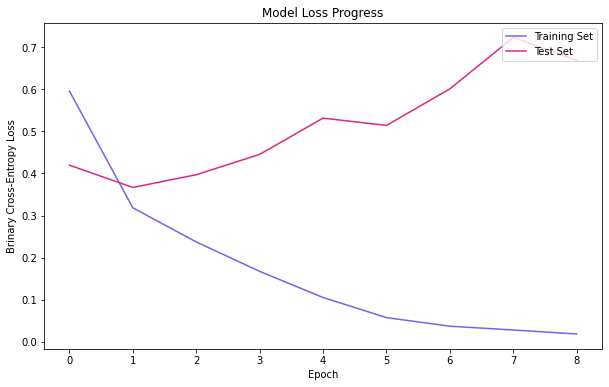

In [ ]:
rnn.save_weights("rnn.hdf5")
fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.show()


782/782 [==============================] - 7s 8ms/step


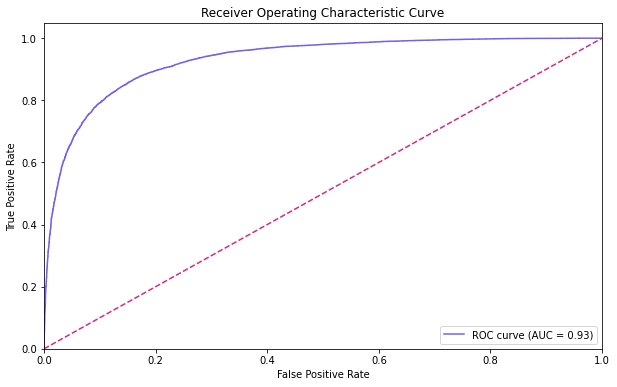

Threshold value is: 0.26387596
0.85344
[[10500  2000]
 [ 1664 10836]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
y_hat = rnn.predict(x_test)
# gets the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)
fig = plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#785ef0',
 label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#dc267f', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
# finds optimal threshold and gets ACC and CM
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
y_pred = np.where(y_hat>=optimal_threshold, 1, 0)
print(balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))